# Fitting polynomials to the Franke Function

This notebook uses `tools.py` to fit a polynomial of degree 5 to the Franke function with OLS, Ridge and Lasso, and analyses the resulting fit using the resampling methods of K-fold-validation and Bootstrap.

We start with some mandatory jupyter magic and imports

In [9]:
%matplotlib  inline
%load_ext autoreload
%autoreload 2

import tools
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
from franke import FrankeFunction, FrankePlot

plt.rcParams.update({'font.size': 16})
figure_dir = 'figures/'

Disable this if you don't want to save the plots:

In [2]:
save_fig = True

## The terrain data

In [15]:
from real_data import load_terrain_data, fit_terrain_data, plot_terrain

filename = 'data/n59_e010_1arc_v3.tif'
lambd = 0.01
deg = 5

zpred, data = fit_terrain_data(filename, lambd, deg)
zpred = zpred.reshape(list(reversed(data.shape)))

MSE 9394.444548105743
R2 0.4520610707226991


In [17]:
zpred.shape, data.shape

((1801, 3601), (3601, 1801))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

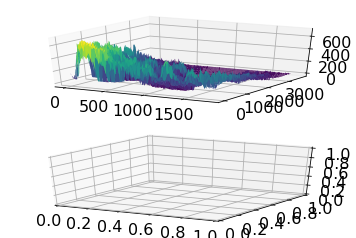

In [18]:
# plot_terrain()
m,n = data.shape

xmesh = np.arange(n)
ymesh = np.arange(m)

[x,y] = np.meshgrid(xmesh, ymesh)


fig = plt.figure()
ax1 = fig.add_subplot(211,projection='3d')
ax2 = fig.add_subplot(212,projection='3d')
ax1.plot_surface(x,y,data,cmap=plt.cm.viridis,linewidth=0)
ax2.plot_surface(x,y,zpred,cmap=plt.cm.viridis,linewidth=0)

# ax = fig.add_subplot(212)
# ax.pcolormesh(x,y,data,cmap=cm.viridis,linewidth=0)
plt.show()


Generating the data is handily provided by `tools.generate_data`, and subsequent model generation is done by creating the design matrix and feeding it to `tools.Regression` for OLS and Ridge regression. $\lambda$ is the penalty in the Ridge regression method, which reduces to OLS if $\lambda = 0$ 